**In case of problems or questions, please first check the list of [Frequently Asked Questions (FAQ)](https://stardist.net/docs/faq.html).**

Please shutdown all other training/prediction notebooks before running this notebook (as those might occupy the GPU memory otherwise).

In [12]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import CellTracker.stardistwrapper as sd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1723662439.py (3): Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display


# Load Data

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.84it/s]


number of images:   2
- training:         1
- validation:       1
X[0].shape=(21, 512, 1024)


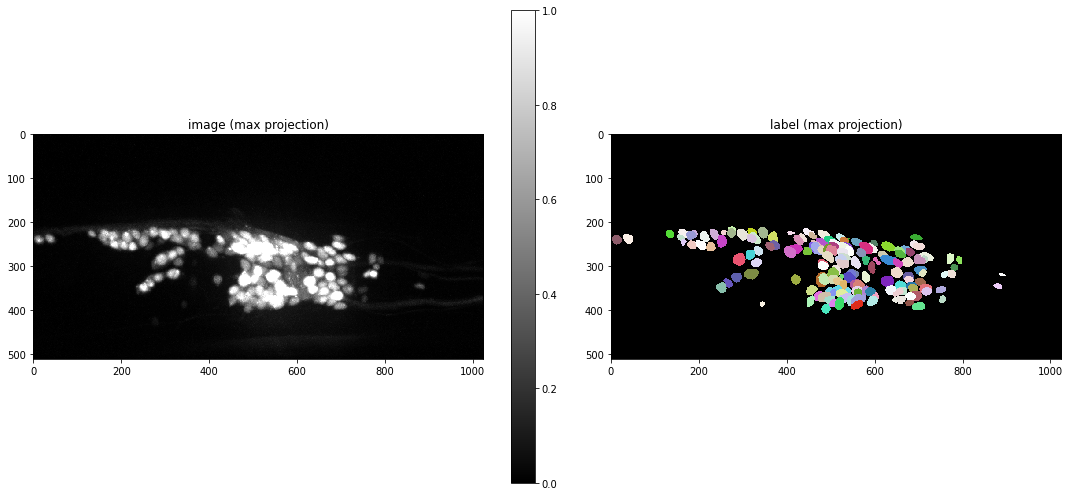

In [13]:
path_train_images = './stardist_01/data/train/images/*.tif'
path_train_labels = './stardist_01/data/train/labels/*.tif'
X, Y, X_trn, Y_trn, X_val, Y_val, n_channel = \
    sd.load_images(path_train_images, path_train_labels, max_projection=True)

# Configuration

A `StarDist3D` model is specified via a `Config3D` object.

In [3]:
model = sd.configure(Y, n_channel)

empirical anisotropy of labeled objects = (6.0, 1.0909090909090908, 1.0)
div_by=(4, 8, 8)
n_dim: 3
axes: ZYXC
n_channel_in: 1
n_channel_out: 97
train_checkpoint: weights_best.h5
train_checkpoint_last: weights_last.h5
train_checkpoint_epoch: weights_now.h5
n_rays: 96
grid: (1, 2, 2)
anisotropy: (6.0, 1.0909090909090908, 1.0)
backbone: unet
rays_json: {'name': 'Rays_GoldenSpiral', 'kwargs': {'n': 96, 'anisotropy': (6.0, 1.0909090909090908, 1.0)}}
n_classes: None
unet_n_depth: 2
unet_kernel_size: (3, 3, 3)
unet_n_filter_base: 32
unet_n_conv_per_depth: 2
unet_pool: (2, 2, 2)
unet_activation: relu
unet_last_activation: relu
unet_batch_norm: False
unet_dropout: 0.0
unet_prefix: 
net_conv_after_unet: 128
net_input_shape: (None, None, None, 1)
net_mask_shape: (None, None, None, 1)
train_patch_size: [20, 112, 112]
train_background_reg: 0.0001
train_foreground_only: 0.9
train_sample_cache: True
train_dist_loss: mae
train_loss_weights: (1, 0.2)
train_class_weights: (1, 1)
train_epochs: 400
train_

base_model.py (149): output path for model already exists, files may be overwritten: /home/wen/PycharmProjects/3DeeCellTracker/Examples/models/stardist
2023-04-07 15:35:01.753401: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-07 15:35:01.757171: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-07 15:35:01.757569: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-07 15:35:01.758067: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following C

Using default values: prob_thresh=0.5, nms_thresh=0.4.


2023-04-07 15:35:02.347456: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-07 15:35:02.824560: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8101


median object size:      [ 4. 22. 24.]
network field of view :  [26 46 46]


# Data Augmentation

You can define a function/callable that applies augmentation to each batch of the data generator.  
We here use an `augmenter` that applies random rotations, flips, and intensity changes, which are typically sensible for (3D) microscopy images (but you can disable augmentation by setting `augmenter = None`).

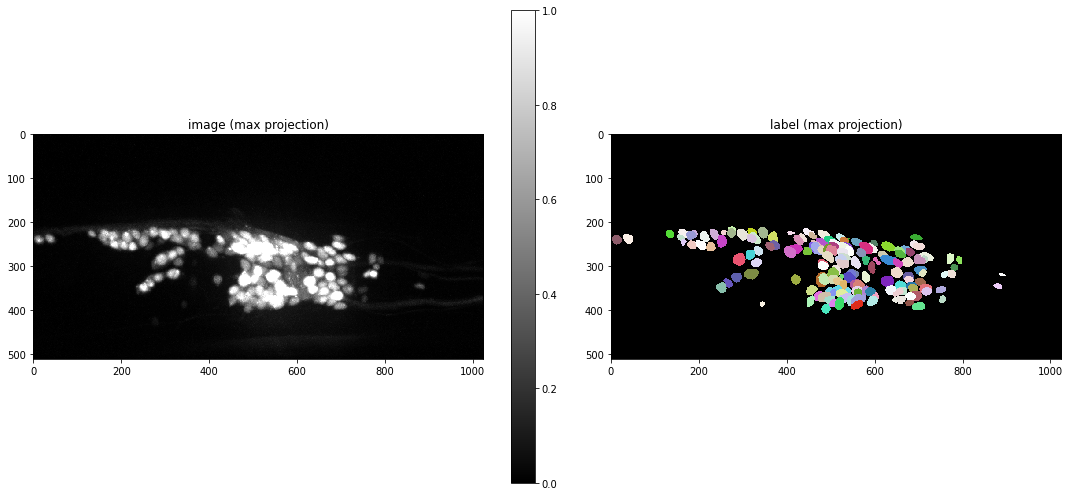

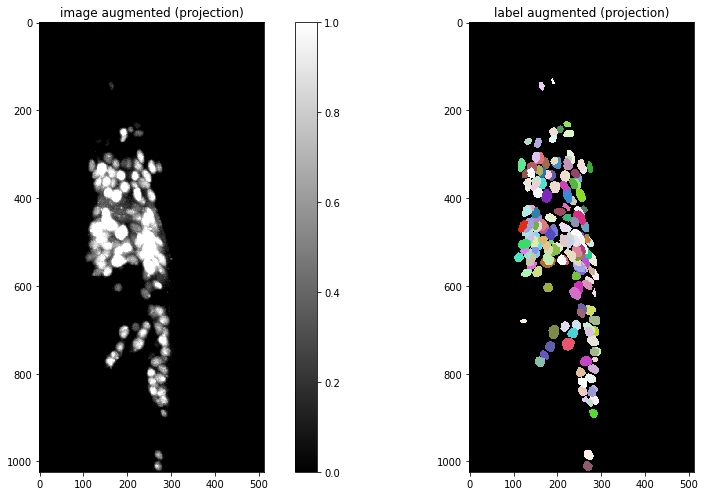

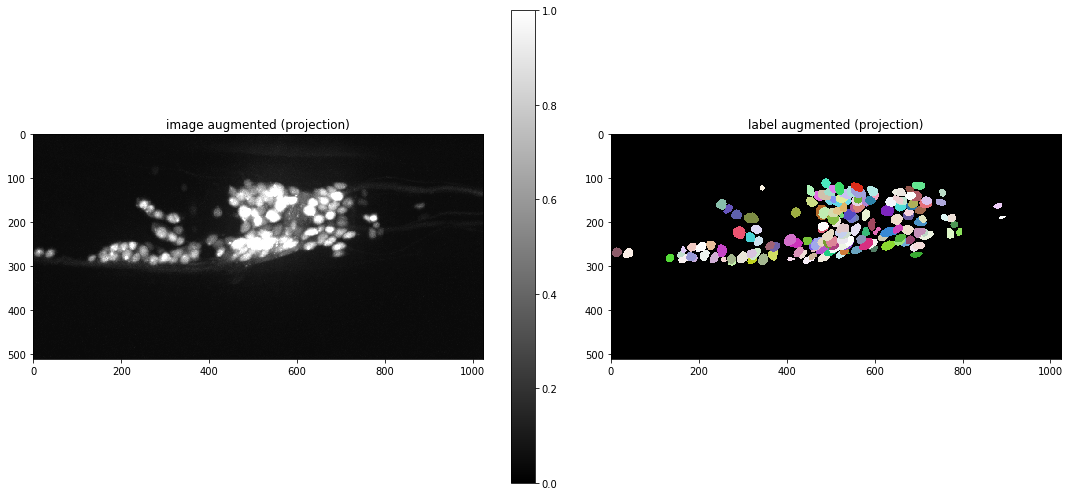

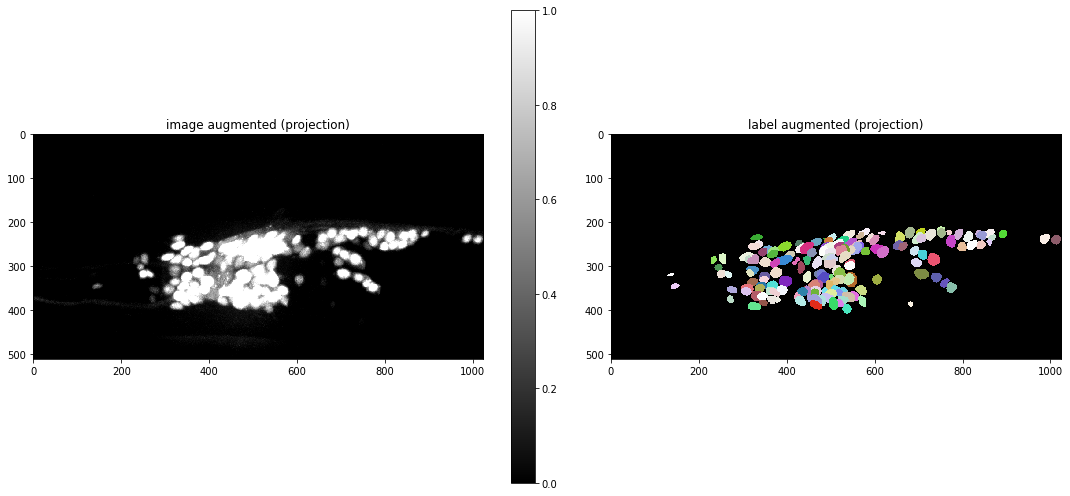

In [14]:
# plot some augmented examples
img, lbl = X[0],Y[0]
sd.plot_img_label_max_projection(img, lbl)
for _ in range(3):
    img_aug, lbl_aug = sd.augmenter(img,lbl)
    sd.plot_img_label_max_projection(img_aug, lbl_aug, img_title="image augmented (projection)", lbl_title="label augmented (projection)")

# Training

We recommend to monitor the progress during training with [TensorBoard](https://www.tensorflow.org/programmers_guide/summaries_and_tensorboard). You can start it in the shell from the current working directory like this:

    $ tensorboard --logdir=.

Then connect to [http://localhost:6006/](http://localhost:6006/) with your browser.


In [5]:
model.train(X_trn, Y_trn, validation_data=(X_val,Y_val), augmenter=sd.augmenter, epochs=500)

Epoch 1/400
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function _gcd_import at 0x7f36144a4430>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function _gcd_import at 0x7f36144a4430>. Note that functions defined in certain environments, like the i

Epoch 16/400
100/100 [==============================] - 7s 66ms/step - loss: 0.3391 - prob_loss: 0.0293 - dist_loss: 1.5490 - prob_kld: 0.0071 - dist_relevant_mae: 1.5487 - dist_relevant_mse: 5.1716 - dist_dist_iou_metric: 0.6310 - val_loss: 0.2483 - val_prob_loss: 0.0086 - val_dist_loss: 1.1984 - val_prob_kld: 0.0022 - val_dist_relevant_mae: 1.1980 - val_dist_relevant_mse: 2.9580 - val_dist_dist_iou_metric: 0.6947
Epoch 17/400
100/100 [==============================] - 7s 66ms/step - loss: 0.3466 - prob_loss: 0.0306 - dist_loss: 1.5803 - prob_kld: 0.0072 - dist_relevant_mae: 1.5800 - dist_relevant_mse: 5.3358 - dist_dist_iou_metric: 0.6430 - val_loss: 0.2359 - val_prob_loss: 0.0084 - val_dist_loss: 1.1372 - val_prob_kld: 0.0020 - val_dist_relevant_mae: 1.1368 - val_dist_relevant_mse: 2.5614 - val_dist_dist_iou_metric: 0.7272
Epoch 18/400
100/100 [==============================] - 7s 66ms/step - loss: 0.3378 - prob_loss: 0.0300 - dist_loss: 1.5391 - prob_kld: 0.0066 - dist_relevant_mae

Epoch 36/400
100/100 [==============================] - 7s 66ms/step - loss: 0.2701 - prob_loss: 0.0249 - dist_loss: 1.2260 - prob_kld: 0.0042 - dist_relevant_mae: 1.2257 - dist_relevant_mse: 3.3501 - dist_dist_iou_metric: 0.7019 - val_loss: 0.2043 - val_prob_loss: 0.0078 - val_dist_loss: 0.9824 - val_prob_kld: 0.0014 - val_dist_relevant_mae: 0.9821 - val_dist_relevant_mse: 2.0569 - val_dist_dist_iou_metric: 0.7547
Epoch 37/400
100/100 [==============================] - 7s 66ms/step - loss: 0.2854 - prob_loss: 0.0274 - dist_loss: 1.2901 - prob_kld: 0.0053 - dist_relevant_mae: 1.2898 - dist_relevant_mse: 3.7515 - dist_dist_iou_metric: 0.6879 - val_loss: 0.2277 - val_prob_loss: 0.0080 - val_dist_loss: 1.0984 - val_prob_kld: 0.0016 - val_dist_relevant_mae: 1.0981 - val_dist_relevant_mse: 2.5018 - val_dist_dist_iou_metric: 0.7255
Epoch 38/400
100/100 [==============================] - 7s 67ms/step - loss: 0.2937 - prob_loss: 0.0308 - dist_loss: 1.3149 - prob_kld: 0.0058 - dist_relevant_mae

Epoch 56/400
100/100 [==============================] - 7s 66ms/step - loss: 0.2588 - prob_loss: 0.0283 - dist_loss: 1.1525 - prob_kld: 0.0044 - dist_relevant_mae: 1.1521 - dist_relevant_mse: 3.0465 - dist_dist_iou_metric: 0.7270 - val_loss: 0.2067 - val_prob_loss: 0.0077 - val_dist_loss: 0.9954 - val_prob_kld: 0.0012 - val_dist_relevant_mae: 0.9950 - val_dist_relevant_mse: 2.0951 - val_dist_dist_iou_metric: 0.7431
Epoch 57/400
100/100 [==============================] - 7s 66ms/step - loss: 0.2515 - prob_loss: 0.0287 - dist_loss: 1.1142 - prob_kld: 0.0046 - dist_relevant_mae: 1.1139 - dist_relevant_mse: 2.9046 - dist_dist_iou_metric: 0.7411 - val_loss: 0.1860 - val_prob_loss: 0.0079 - val_dist_loss: 0.8904 - val_prob_kld: 0.0015 - val_dist_relevant_mae: 0.8901 - val_dist_relevant_mse: 1.7526 - val_dist_dist_iou_metric: 0.7673
Epoch 58/400
100/100 [==============================] - 7s 67ms/step - loss: 0.2460 - prob_loss: 0.0246 - dist_loss: 1.1069 - prob_kld: 0.0039 - dist_relevant_mae

100/100 [==============================] - 7s 66ms/step - loss: 0.2189 - prob_loss: 0.0263 - dist_loss: 0.9631 - prob_kld: 0.0031 - dist_relevant_mae: 0.9628 - dist_relevant_mse: 2.1558 - dist_dist_iou_metric: 0.7665 - val_loss: 0.1520 - val_prob_loss: 0.0073 - val_dist_loss: 0.7237 - val_prob_kld: 8.8211e-04 - val_dist_relevant_mae: 0.7234 - val_dist_relevant_mse: 1.2597 - val_dist_dist_iou_metric: 0.8092
Epoch 95/400
100/100 [==============================] - 7s 66ms/step - loss: 0.2186 - prob_loss: 0.0233 - dist_loss: 0.9765 - prob_kld: 0.0030 - dist_relevant_mae: 0.9762 - dist_relevant_mse: 2.1796 - dist_dist_iou_metric: 0.7680 - val_loss: 0.1603 - val_prob_loss: 0.0073 - val_dist_loss: 0.7651 - val_prob_kld: 8.3427e-04 - val_dist_relevant_mae: 0.7648 - val_dist_relevant_mse: 1.3222 - val_dist_dist_iou_metric: 0.8014
Epoch 96/400
100/100 [==============================] - 7s 65ms/step - loss: 0.2230 - prob_loss: 0.0263 - dist_loss: 0.9836 - prob_kld: 0.0034 - dist_relevant_mae: 0.9

100/100 [==============================] - 7s 65ms/step - loss: 0.1977 - prob_loss: 0.0259 - dist_loss: 0.8590 - prob_kld: 0.0027 - dist_relevant_mae: 0.8587 - dist_relevant_mse: 1.6946 - dist_dist_iou_metric: 0.7918 - val_loss: 0.1376 - val_prob_loss: 0.0071 - val_dist_loss: 0.6527 - val_prob_kld: 6.7931e-04 - val_dist_relevant_mae: 0.6524 - val_dist_relevant_mse: 1.0349 - val_dist_dist_iou_metric: 0.8285
Epoch 133/400
100/100 [==============================] - 7s 65ms/step - loss: 0.1968 - prob_loss: 0.0279 - dist_loss: 0.8442 - prob_kld: 0.0028 - dist_relevant_mae: 0.8439 - dist_relevant_mse: 1.6504 - dist_dist_iou_metric: 0.7983 - val_loss: 0.1378 - val_prob_loss: 0.0071 - val_dist_loss: 0.6535 - val_prob_kld: 6.9518e-04 - val_dist_relevant_mae: 0.6532 - val_dist_relevant_mse: 1.0176 - val_dist_dist_iou_metric: 0.8293
Epoch 134/400
100/100 [==============================] - 7s 65ms/step - loss: 0.2055 - prob_loss: 0.0276 - dist_loss: 0.8895 - prob_kld: 0.0030 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1864 - prob_loss: 0.0251 - dist_loss: 0.8062 - prob_kld: 0.0025 - dist_relevant_mae: 0.8059 - dist_relevant_mse: 1.5314 - dist_dist_iou_metric: 0.7894 - val_loss: 0.1372 - val_prob_loss: 0.0070 - val_dist_loss: 0.6507 - val_prob_kld: 6.1104e-04 - val_dist_relevant_mae: 0.6504 - val_dist_relevant_mse: 1.0112 - val_dist_dist_iou_metric: 0.8251
Epoch 171/400
100/100 [==============================] - 7s 66ms/step - loss: 0.1827 - prob_loss: 0.0229 - dist_loss: 0.7992 - prob_kld: 0.0023 - dist_relevant_mae: 0.7989 - dist_relevant_mse: 1.5027 - dist_dist_iou_metric: 0.7970 - val_loss: 0.1290 - val_prob_loss: 0.0070 - val_dist_loss: 0.6096 - val_prob_kld: 6.1166e-04 - val_dist_relevant_mae: 0.6093 - val_dist_relevant_mse: 0.8778 - val_dist_dist_iou_metric: 0.8409
Epoch 172/400
100/100 [==============================] - 7s 66ms/step - loss: 0.1846 - prob_loss: 0.0239 - dist_loss: 0.8032 - prob_kld: 0.0024 - dist_relevant_mae: 0

100/100 [==============================] - 7s 65ms/step - loss: 0.1778 - prob_loss: 0.0224 - dist_loss: 0.7769 - prob_kld: 0.0021 - dist_relevant_mae: 0.7766 - dist_relevant_mse: 1.4244 - dist_dist_iou_metric: 0.8041 - val_loss: 0.1823 - val_prob_loss: 0.0071 - val_dist_loss: 0.8762 - val_prob_kld: 6.6696e-04 - val_dist_relevant_mae: 0.8759 - val_dist_relevant_mse: 1.4077 - val_dist_dist_iou_metric: 0.7975
Epoch 209/400
100/100 [==============================] - 7s 66ms/step - loss: 0.2048 - prob_loss: 0.0267 - dist_loss: 0.8903 - prob_kld: 0.0035 - dist_relevant_mae: 0.8900 - dist_relevant_mse: 1.8254 - dist_dist_iou_metric: 0.7884 - val_loss: 0.1406 - val_prob_loss: 0.0070 - val_dist_loss: 0.6680 - val_prob_kld: 5.7985e-04 - val_dist_relevant_mae: 0.6677 - val_dist_relevant_mse: 0.9921 - val_dist_dist_iou_metric: 0.8168
Epoch 210/400
100/100 [==============================] - 7s 66ms/step - loss: 0.1957 - prob_loss: 0.0290 - dist_loss: 0.8336 - prob_kld: 0.0029 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1719 - prob_loss: 0.0255 - dist_loss: 0.7319 - prob_kld: 0.0022 - dist_relevant_mae: 0.7316 - dist_relevant_mse: 1.3288 - dist_dist_iou_metric: 0.7886 - val_loss: 0.1194 - val_prob_loss: 0.0070 - val_dist_loss: 0.5616 - val_prob_kld: 6.2305e-04 - val_dist_relevant_mae: 0.5613 - val_dist_relevant_mse: 0.7615 - val_dist_dist_iou_metric: 0.8501
Epoch 247/400
100/100 [==============================] - 7s 66ms/step - loss: 0.1718 - prob_loss: 0.0252 - dist_loss: 0.7331 - prob_kld: 0.0021 - dist_relevant_mae: 0.7329 - dist_relevant_mse: 1.2788 - dist_dist_iou_metric: 0.8199 - val_loss: 0.1301 - val_prob_loss: 0.0071 - val_dist_loss: 0.6150 - val_prob_kld: 6.4923e-04 - val_dist_relevant_mae: 0.6147 - val_dist_relevant_mse: 0.8904 - val_dist_dist_iou_metric: 0.8335
Epoch 248/400
100/100 [==============================] - 7s 66ms/step - loss: 0.1734 - prob_loss: 0.0268 - dist_loss: 0.7327 - prob_kld: 0.0022 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1627 - prob_loss: 0.0217 - dist_loss: 0.7048 - prob_kld: 0.0017 - dist_relevant_mae: 0.7045 - dist_relevant_mse: 1.1711 - dist_dist_iou_metric: 0.8232 - val_loss: 0.1153 - val_prob_loss: 0.0070 - val_dist_loss: 0.5413 - val_prob_kld: 5.8160e-04 - val_dist_relevant_mae: 0.5411 - val_dist_relevant_mse: 0.6884 - val_dist_dist_iou_metric: 0.8580
Epoch 285/400
100/100 [==============================] - 7s 66ms/step - loss: 0.1707 - prob_loss: 0.0277 - dist_loss: 0.7151 - prob_kld: 0.0021 - dist_relevant_mae: 0.7148 - dist_relevant_mse: 1.2244 - dist_dist_iou_metric: 0.8265 - val_loss: 0.1175 - val_prob_loss: 0.0069 - val_dist_loss: 0.5529 - val_prob_kld: 5.1889e-04 - val_dist_relevant_mae: 0.5527 - val_dist_relevant_mse: 0.7182 - val_dist_dist_iou_metric: 0.8542
Epoch 286/400
100/100 [==============================] - 7s 66ms/step - loss: 0.1693 - prob_loss: 0.0265 - dist_loss: 0.7140 - prob_kld: 0.0021 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1706 - prob_loss: 0.0255 - dist_loss: 0.7252 - prob_kld: 0.0021 - dist_relevant_mae: 0.7250 - dist_relevant_mse: 1.2472 - dist_dist_iou_metric: 0.8237 - val_loss: 0.1145 - val_prob_loss: 0.0071 - val_dist_loss: 0.5372 - val_prob_kld: 6.4121e-04 - val_dist_relevant_mae: 0.5369 - val_dist_relevant_mse: 0.6855 - val_dist_dist_iou_metric: 0.8585
Epoch 323/400
100/100 [==============================] - 7s 66ms/step - loss: 0.1625 - prob_loss: 0.0244 - dist_loss: 0.6902 - prob_kld: 0.0020 - dist_relevant_mae: 0.6899 - dist_relevant_mse: 1.1697 - dist_dist_iou_metric: 0.8175 - val_loss: 0.1117 - val_prob_loss: 0.0070 - val_dist_loss: 0.5232 - val_prob_kld: 6.2035e-04 - val_dist_relevant_mae: 0.5230 - val_dist_relevant_mse: 0.6402 - val_dist_dist_iou_metric: 0.8611
Epoch 324/400
100/100 [==============================] - 7s 66ms/step - loss: 0.1672 - prob_loss: 0.0230 - dist_loss: 0.7210 - prob_kld: 0.0020 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1550 - prob_loss: 0.0220 - dist_loss: 0.6647 - prob_kld: 0.0016 - dist_relevant_mae: 0.6645 - dist_relevant_mse: 1.0762 - dist_dist_iou_metric: 0.8312 - val_loss: 0.1179 - val_prob_loss: 0.0070 - val_dist_loss: 0.5544 - val_prob_kld: 5.8077e-04 - val_dist_relevant_mae: 0.5542 - val_dist_relevant_mse: 0.6885 - val_dist_dist_iou_metric: 0.8545
Epoch 361/400
100/100 [==============================] - 7s 66ms/step - loss: 0.1595 - prob_loss: 0.0229 - dist_loss: 0.6832 - prob_kld: 0.0018 - dist_relevant_mae: 0.6830 - dist_relevant_mse: 1.1397 - dist_dist_iou_metric: 0.8138 - val_loss: 0.1211 - val_prob_loss: 0.0069 - val_dist_loss: 0.5712 - val_prob_kld: 4.6867e-04 - val_dist_relevant_mae: 0.5710 - val_dist_relevant_mse: 0.7325 - val_dist_dist_iou_metric: 0.8470
Epoch 362/400
100/100 [==============================] - 7s 66ms/step - loss: 0.1587 - prob_loss: 0.0245 - dist_loss: 0.6714 - prob_kld: 0.0018 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1529 - prob_loss: 0.0231 - dist_loss: 0.6491 - prob_kld: 0.0016 - dist_relevant_mae: 0.6489 - dist_relevant_mse: 1.0213 - dist_dist_iou_metric: 0.8357 - val_loss: 0.1096 - val_prob_loss: 0.0069 - val_dist_loss: 0.5132 - val_prob_kld: 5.0532e-04 - val_dist_relevant_mae: 0.5130 - val_dist_relevant_mse: 0.6211 - val_dist_dist_iou_metric: 0.8617
Epoch 399/400
100/100 [==============================] - 7s 66ms/step - loss: 0.1512 - prob_loss: 0.0232 - dist_loss: 0.6397 - prob_kld: 0.0015 - dist_relevant_mae: 0.6395 - dist_relevant_mse: 1.0123 - dist_dist_iou_metric: 0.8382 - val_loss: 0.1068 - val_prob_loss: 0.0069 - val_dist_loss: 0.4992 - val_prob_kld: 4.9082e-04 - val_dist_relevant_mae: 0.4990 - val_dist_relevant_mse: 0.5885 - val_dist_dist_iou_metric: 0.8677
Epoch 400/400
100/100 [==============================] - 7s 66ms/step - loss: 0.1482 - prob_loss: 0.0245 - dist_loss: 0.6181 - prob_kld: 0.0016 - dist_relevant_mae: 0

# Threshold optimization

While the default values for the probability and non-maximum suppression thresholds already yield good results in many cases, we still recommend to adapt the thresholds to your data. The optimized threshold values are saved to disk and will be automatically loaded with the model.

In [6]:
model.optimize_thresholds(X_val, Y_val)

NMS threshold = 0.5:  75%|████████████████████████████████████████████████████████████████████████████████████                            | 15/20 [00:29<00:09,  1.95s/it, 0.691 -> 0.933]


Using optimized values: prob_thresh=0.688901, nms_thresh=0.3.
Saving to 'thresholds.json'.


{'prob': 0.6889011740009963, 'nms': 0.3}

# Evaluation and Detection Performance

Besides the losses and metrics during training, we can also quantitatively evaluate the actual detection/segmentation performance on the validation data by considering objects in the ground truth to be correctly matched if there are predicted objects with overlap (here [intersection over union (IoU)](https://en.wikipedia.org/wiki/Jaccard_index)) beyond a chosen IoU threshold $\tau$.

The corresponding matching statistics (average overlap, accuracy, recall, precision, etc.) are typically of greater practical relevance than the losses/metrics computed during training (but harder to formulate as a loss function). 
The value of $\tau$ can be between 0 (even slightly overlapping objects count as correctly predicted) and 1 (only pixel-perfectly overlapping objects count) and which $\tau$ to use depends on the needed segmentation precision/application.

Please see `help(matching)` for definitions of the abbreviations used in the evaluation below and see the Wikipedia page on [Sensitivity and specificity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) for further details.

In [ ]:
# help(matching)

First predict the labels for all validation images:

In [9]:
Y0_val_pred = model.predict_instances(X_val[0], n_tiles=model._guess_n_tiles(X_val[0]), show_tile_progress=False)[0]

Plot a GT/prediction example  

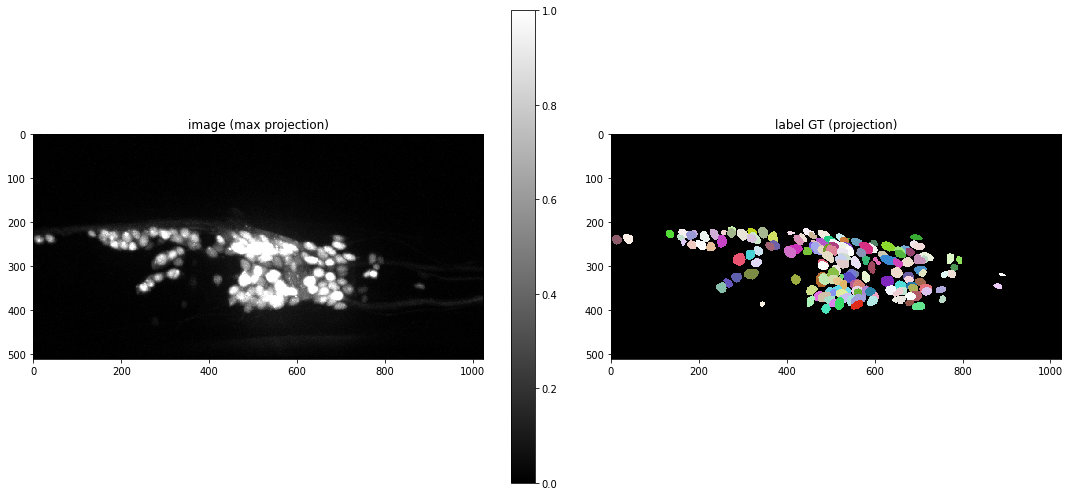

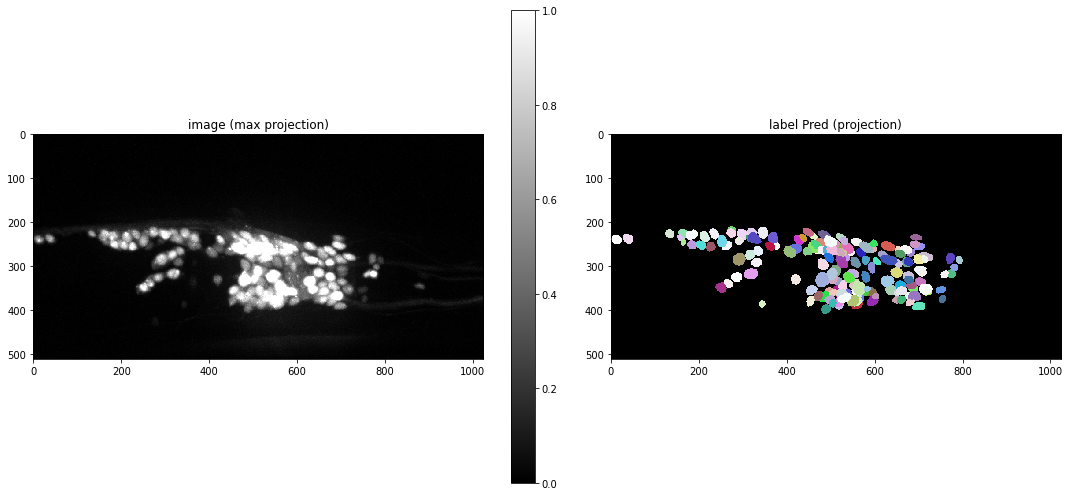

In [15]:
sd.plot_img_label_max_projection(X_val[0],Y_val[0], lbl_title="label GT (projection)")
sd.plot_img_label_max_projection(X_val[0],Y0_val_pred, lbl_title="label Pred (projection)")